In [58]:
import pandas as pd

# Load dataset (replace with your filename, e.g., "air_quality.csv")
df = pd.read_csv("station_day.csv")

# Preview dataset
print("First 5 rows:\n", df.head())
print("\nColumns:\n", df.columns)

# Convert Date column if present
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure all pollutant columns are numeric
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
              'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in pollutants:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing AQI
df = df.dropna(subset=['AQI'])

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Example 1: Average pollutant values
avg_pollutants = df[pollutants].mean()
print("\nAverage pollutant levels:\n", avg_pollutants)

# Example 2: Count how many days fall into each AQI bucket
aqi_counts = df['AQI_Bucket'].value_counts()
print("\nAQI Bucket counts:\n", aqi_counts)

# Example 3: Filter "Poor" days
poor_days = df[df['AQI_Bucket'].str.contains("Poor", na=False)]
print("\nSample Poor Days:\n", poor_days.head())

# Save cleaned dataset
df.to_csv("station_day.csv", index=False)
print("\nCleaned dataset saved as station_day.csv")

First 5 rows:
   StationId        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0     AP001  2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1     AP001  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2     AP001  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3     AP001  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4     AP001  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  10.76  109.26     0.17     5.92    0.10    NaN        NaN  
1  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  
2  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  
3  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  
4  19.00  138.18     0.17     5.02    0.07  188.0   Moderate  

Columns:
 Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Buc

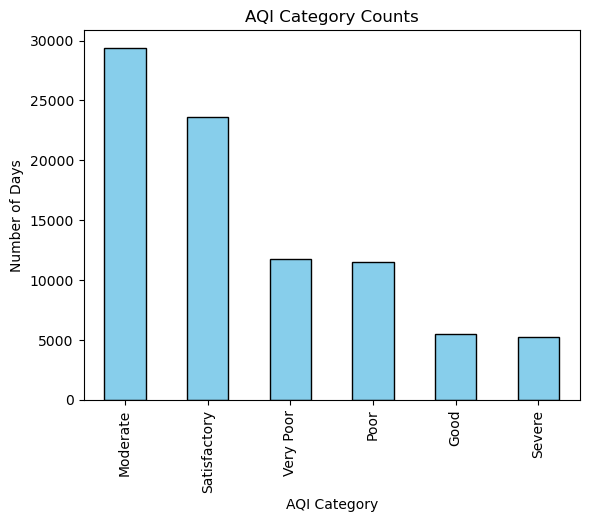

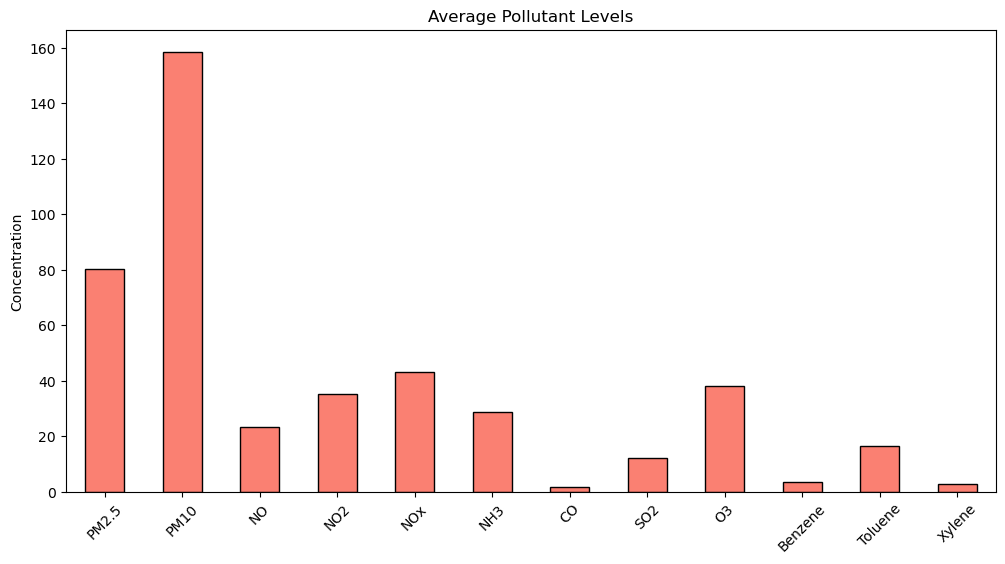

In [64]:
import matplotlib.pyplot as plt

# 1. Plot AQI distribution by category
df['AQI_Bucket'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("AQI Category Counts")
plt.xlabel("AQI Category")
plt.ylabel("Number of Days")
plt.show()

# 2. Plot average pollutant levels
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3',
    'Benzene','Toluene','Xylene']].mean().plot(kind='bar', figsize=(12,6), color='salmon', edgecolor='black')
plt.title("Average Pollutant Levels")
plt.ylabel("Concentration")
plt.xticks(rotation=45)
plt.show()

# 3. AQI trend over time (if you have Date column)
if 'date' in df.columns:
    df.plot(x='date', y='aqi', figsize=(12,6), color='green')
    plt.title("AQI Trend Over Time")
    plt.ylabel("AQI")
    plt.show()

In [66]:
worst_day=df.loc[df['AQI'].idxmax()]
print("\n Most polluted day:")
print(worst_day)




 Most polluted day:
StationId          GJ001
Date          2018-02-19
PM2.5             242.66
PM10                 NaN
NO                132.47
NO2               199.17
NOx               246.03
NH3                  NaN
CO                132.47
SO2                  NaN
O3                 44.06
Benzene             0.74
Toluene             5.81
Xylene              3.21
AQI               2049.0
AQI_Bucket        Severe
Name: 52402, dtype: object


In [70]:
best_day=df.loc[df['AQI'].idxmin()]
print("\n cleanest day:")
print(best_day)



 cleanest day:
StationId          KA003
Date          2017-09-17
PM2.5               2.99
PM10                 NaN
NO                  6.87
NO2                23.98
NOx                  NaN
NH3                  NaN
CO                   0.0
SO2                 4.92
O3                   5.9
Benzene             0.55
Toluene             0.64
Xylene               NaN
AQI                  8.0
AQI_Bucket          Good
Name: 59161, dtype: object


Cleaned Columns: ['stationid', 'date', 'pm2.5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'co', 'so2', 'o3', 'benzene', 'toluene', 'xylene', 'aqi', 'aqi_bucket']

✅ Accuracy: 0.8482792050412021

📊 Classification Report:
               precision    recall  f1-score   support

        Good       0.86      0.72      0.78       215
    Moderate       0.88      0.90      0.89       880
        Poor       0.71      0.71      0.71       122
Satisfactory       0.83      0.86      0.85       746
      Severe       0.75      0.60      0.67        20
   Very Poor       0.79      0.78      0.78        80

    accuracy                           0.85      2063
   macro avg       0.81      0.76      0.78      2063
weighted avg       0.85      0.85      0.85      2063



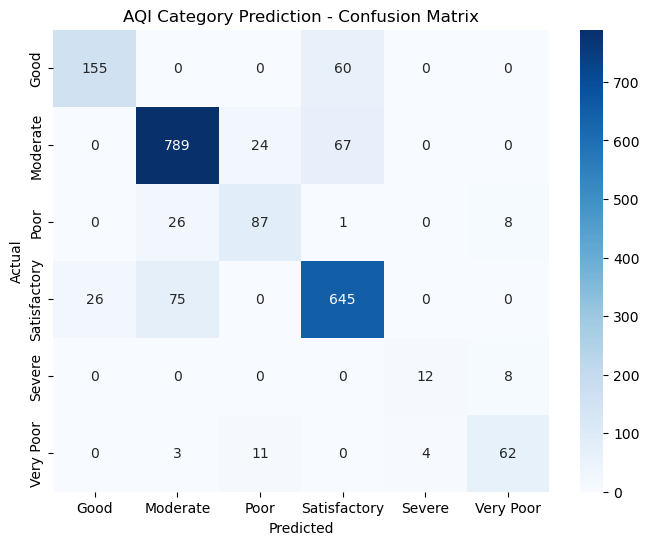

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("station_day.csv", dtype=str)  # load all as string

# -----------------------------
# 2. Clean column names
# -----------------------------
df.columns = df.columns.str.strip().str.replace('\n','').str.lower()
print("Cleaned Columns:", df.columns.tolist())

# -----------------------------
# 3. Define pollutant features
# -----------------------------
pollutants = ['pm2.5','pm10','no','no2','nox','nh3','co','so2','o3','benzene','toluene','xylene']

# Convert pollutant columns to numeric
for col in pollutants:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid values become NaN

# -----------------------------
# 4. Drop rows with missing values
# -----------------------------
target_column = 'aqi_bucket'  # AQI category column
df = df.dropna(subset=pollutants + [target_column])

# -----------------------------
# 5. Encode target labels
# -----------------------------
le = LabelEncoder()
df['bucket_encoded'] = le.fit_transform(df[target_column])

# -----------------------------
# 6. Split features & target
# -----------------------------
X = df[pollutants]
y = df['bucket_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 7. Train Random Forest Model
# -----------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("AQI Category Prediction - Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("station_day.csv", dtype=str)  # load all as string
df_sample=df.sample(n=5,random_state=42)


# -----------------------------
# 2. Clean column names
# -----------------------------
df.columns = df.columns.str.strip().str.replace('\n','').str.lower()
print("Cleaned Columns:", df.columns.tolist())

# -----------------------------
# 3. Define pollutant features
# -----------------------------
pollutants = ['pm2.5','pm10','no','no2','nox','nh3','co','so2','o3','benzene','toluene','xylene']
sample_input=[]
print("\n enter pollutant values for prediction:")



# Convert pollutant columns to numeric
for col in pollutants:
    val=float(input(f"{col}:"))
    sample_input_append(val)
sample_input=np.array([sample_input])
pre_catagory=le.inverse_transform(model.predict(sample_input))[0]
print(f"\n predicted AQI category:P{pred_category}")
# 4. Drop rows with missing values
# -----------------------------
target_column = [col for col in df.columns if 'bucket' in col][0]  # automatically find AQI category column
df = df.dropna(subset=pollutants + [target_column])

# -----------------------------
# 5. Monitoring: summary stats & AQI category counts
# -----------------------------
print("\n--- Summary Statistics ---")
print(df[pollutants].describe())

print("\n--- AQI Category Counts ---")
print(df[target_column].value_counts())

# Plot AQI category counts
plt.figure(figsize=(8,5))
sns.countplot(x=target_column, data=df, order=df[target_column].value_counts().index)
plt.title("AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Number of Days")
plt.show()

# -----------------------------
# 6. Encode target for prediction
# -----------------------------
le = LabelEncoder()
df['bucket_encoded'] = le.fit_transform(df[target_column])

# -----------------------------
# 7. Split data & train Random Forest
# -----------------------------
X = df[pollutants]
y = df['bucket_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate model
# -----------------------------
y_pred = model.predict(X_test)

print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AQI Category Prediction")
plt.show()

# -----------------------------
# 9. Manual Input Prediction
# -----------------------------
print("\n🌟 Enter new pollutant values to predict AQI Category:")
sample_input = []
for col in pollutants:
    while True:
        try:
            val = float(input(f"{col}: "))
            sample_input.append(val)
            break
        except:
            print("Enter a numeric value!")

sample_input = np.array([sample_input])
pred_category = le.inverse_transform(model.predict(sample_input))[0]
print(f"\n🌍 Predicted AQI Category for your input: {pred_category}")

Cleaned Columns: ['stationid', 'date', 'pm2.5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'co', 'so2', 'o3', 'benzene', 'toluene', 'xylene', 'aqi', 'aqi_bucket']

 enter pollutant values for prediction:
